In [1]:
import os
import json
import matplotlib.pyplot as plt
import tqdm
import pprint
import numpy as np
import pandas as pd
from collections import defaultdict

In [2]:
filepath = "./../non_packed_combined_result.json"
with open(filepath, 'r') as f:
    json_data = json.load(f)
print(len(json_data))
print(json_data.keys())

231
dict_keys(['/scratch/tathagato/non_packed_experiment_outputs/extractiveness_extractiveness_0.0001_checkpoint-1000_extractiveness.json', '/scratch/tathagato/non_packed_experiment_outputs/extractiveness_extractiveness_0.0001_checkpoint-1200_extractiveness.json', '/scratch/tathagato/non_packed_experiment_outputs/extractiveness_extractiveness_0.0001_checkpoint-1400_extractiveness.json', '/scratch/tathagato/non_packed_experiment_outputs/extractiveness_extractiveness_0.0001_checkpoint-1600_extractiveness.json', '/scratch/tathagato/non_packed_experiment_outputs/extractiveness_extractiveness_0.0001_checkpoint-1800_extractiveness.json', '/scratch/tathagato/non_packed_experiment_outputs/extractiveness_extractiveness_0.0001_checkpoint-2000_extractiveness.json', '/scratch/tathagato/non_packed_experiment_outputs/extractiveness_extractiveness_0.0001_checkpoint-200_extractiveness.json', '/scratch/tathagato/non_packed_experiment_outputs/extractiveness_extractiveness_0.0001_checkpoint-2200_extracti

In [3]:
attributes = [(key, json_data[key]['attribute']) for key in json_data.keys()]
#extractiveness 
extractiveness_results = [(key,json_data[key]) for key in json_data.keys() if json_data[key]['attribute'] == 'extractiveness']
print(len(extractiveness_results))
topic_results = [(key,json_data[key]) for key in json_data.keys() if json_data[key]['attribute'] == 'topic']
print(len(topic_results))
length_results = [(key,json_data[key]) for key in json_data.keys() if json_data[key]['attribute'] == 'length']
print(len(length_results))
specificity_results = [(key,json_data[key]) for key in json_data.keys() if json_data[key]['attribute'] == 'specificity']
print(len(specificity_results))

66
33
66
66


### EXTRACTIVITY

In [4]:
#max_val = 4000 for extractiveness
def get_lr_and_checkpoint(path, max_val = 4000):
    basename = os.path.basename(path)
    #given extractiveness_extractiveness_0.0001_checkpoint-1000_extractiveness.json
    # return (0.0001, 1000)

    lr = float(basename.split('_')[2])
    if "checkpoint" in basename:
        checkpoint = int(basename.split('_')[3].split('-')[1])
    else:
        checkpoint = max_val
    return lr, checkpoint

In [5]:
print(extractiveness_results[1])

('/scratch/tathagato/non_packed_experiment_outputs/extractiveness_extractiveness_0.0001_checkpoint-1200_extractiveness.json', {'result': {'normal': {'num_examples': 477, 'prediction_density': 3.286304011690384, 'prediction_coverage': 0.8238899101530818, 'prediction_overlap': 0.40008143947235214, 'reference_density': 3.240200239588943, 'reference_coverage': 0.8743050891680069, 'reference_overlap': 0.45655503681256693, 'cer': 0.8301311104548547, 'prediction_f_score': 0.32081628930817613, 'gold_f_score': 0.36717724318658296}, 'fully': {'num_examples': 36, 'prediction_density': 2.666785174126067, 'prediction_coverage': 0.7649926522197195, 'prediction_overlap': 0.37618846621362817, 'reference_density': 9.769485766317233, 'reference_coverage': 0.9460150114205875, 'reference_overlap': 0.7703843924108396, 'cer': 0.661558655000126, 'prediction_f_score': 0.2957194444444445, 'gold_f_score': 0.7742987500000001}, 'high': {'num_examples': 41, 'prediction_density': 3.65178468928651, 'prediction_cover

In [7]:
ext_results = []
for res in extractiveness_results:
    name, result = res
    lr, checkpoint = get_lr_and_checkpoint(name)
    ext_results.append((name, lr, checkpoint, result))


In [8]:
pprint.pprint(ext_results[0][3])
pprint.pprint(ext_results[1][3])

{'attribute': 'extractiveness',
 'result': {'fully': {'cer': 0.6034132229809378,
                      'gold_f_score': 0.7742987500000001,
                      'num_examples': 36,
                      'prediction_coverage': 0.7998782947606188,
                      'prediction_density': 3.7652142605028516,
                      'prediction_f_score': 0.35627499999999995,
                      'prediction_overlap': 0.42351784409330734,
                      'reference_coverage': 0.9460150114205875,
                      'reference_density': 9.769485766317233,
                      'reference_overlap': 0.7703843924108396},
            'high': {'cer': 0.7520477870572535,
                     'gold_f_score': 0.4607803658536585,
                     'num_examples': 41,
                     'prediction_coverage': 0.8401100718177811,
                     'prediction_density': 3.538216095570453,
                     'prediction_f_score': 0.34900609756097556,
                     'prediction_o

In [9]:
#prediction density groupoed by lr x axis checkpoint y axis prediction density
control_value = 'fully'
control_metric = 'prediction_density'
reference_metric = 'reference_density'
dictionary = {}
for res in new_results:
    name, lr, checkpoint, result = res
    prediction_density = result['result'][control_value][control_metric]
    if lr not in dictionary:
        dictionary[lr] = []
    dictionary[lr].append((checkpoint, prediction_density))
    
for key in dictionary.keys():
    dictionary[key] = sorted(dictionary[key], key=lambda x: x[0])
    x = [x[0] for x in dictionary[key]]
    y = [x[1] for x in dictionary[key]]
    plt.plot(x, y, label=key)
baseline = new_results[0][3]['result'][control_value][reference_metric]
#dotted line for baseline
plt.axhline(y=baseline, color='r', linestyle='--', label='baseline')
plt.legend()
plt.title("prediction density when attribute is fully")

NameError: name 'new_results' is not defined

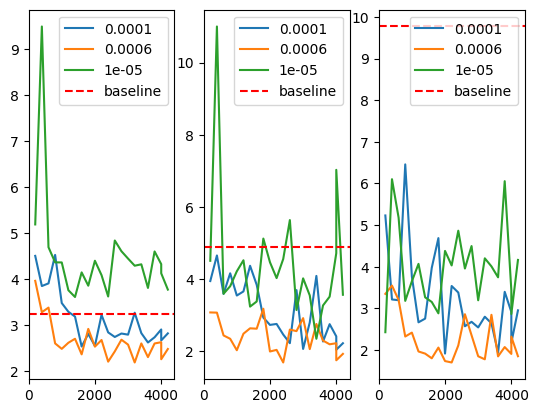

In [15]:
#prediction density groupoed by lr x axis checkpoint y axis prediction density
fig = plt.figure()
control_metric = 'prediction_density'
reference_metric = 'reference_density'
for index,control_value in enumerate(['normal','high','fully']):
    #control_value = 'normal'
    fig.add_subplot(1,3,index + 1)

    dictionary = {}
    for res in ext_results:
        name, lr, checkpoint, result = res
        prediction_density = result['result'][control_value][control_metric]
        if lr not in dictionary:
            dictionary[lr] = []
        dictionary[lr].append((checkpoint, prediction_density))
        
    for key in dictionary.keys():
        dictionary[key] = sorted(dictionary[key], key=lambda x: x[0])
        x = [x[0] for x in dictionary[key]]
        y = [x[1] for x in dictionary[key]]
        plt.plot(x, y, label=key)
    baseline = ext_results[0][3]['result'][control_value][reference_metric]
    #dotted line for baseline
    plt.axhline(y=baseline, color='r', linestyle='--', label='baseline')
    plt.legend()
#plt.title(f"prediction density when attribute is {control_value}")

In [ ]:
#prediction density groupoed by lr x axis checkpoint y axis prediction density
control_value = 'high'
control_metric = 'prediction_density'
reference_metric = 'reference_density'
dictionary = {}
for res in ext_results:
    name, lr, checkpoint, result = res
    prediction_density = result['result'][control_value][control_metric]
    if lr not in dictionary:
        dictionary[lr] = []
    dictionary[lr].append((checkpoint, prediction_density))
    
for key in dictionary.keys():
    dictionary[key] = sorted(dictionary[key], key=lambda x: x[0])
    x = [x[0] for x in dictionary[key]]
    y = [x[1] for x in dictionary[key]]
    plt.plot(x, y, label=key)
baseline = ext_results[0][3]['result'][control_value][reference_metric]
#dotted line for baseline
plt.axhline(y=baseline, color='r', linestyle='--', label='baseline')
plt.legend()
plt.title(f"prediction density when attribute is {control_value}")